In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import json

In [3]:
odf = pd.read_csv("Poverty_by_Race_Ethnicity.csv")
odf

,Location,Race/Ethnicity,TimeFrame,DataFormat,Data,Fips
0,Battery Park/Tribeca,All Races and Ethnicities,2007,Number,4017.84258,101
1,Battery Park/Tribeca,White,2007,Number,2179.14148,101
2,Battery Park/Tribeca,Black,2007,Number,33.92288,101
3,Battery Park/Tribeca,Latino,2007,Number,251.19088,101
4,Battery Park/Tribeca,Asian,2007,Number,1485.33772,101
...,...,...,...,...,...,...
4683,Tottenville,Asian,2014,Percent,0.08017,503
4684,Tottenville,Black,2014,Percent,0.04000,503
4685,Tottenville,Latino,2014,Percent,0.11065,503
4686,Tottenville,White,2014,Percent,0.09296,503


In [21]:
df = odf[odf['DataFormat'].str.contains('Number')]
df

,Location,Race/Ethnicity,TimeFrame,DataFormat,Data,Fips
0,Battery Park/Tribeca,All Races and Ethnicities,2007,Number,4017.84258,101
1,Battery Park/Tribeca,White,2007,Number,2179.14148,101
2,Battery Park/Tribeca,Black,2007,Number,33.92288,101
3,Battery Park/Tribeca,Latino,2007,Number,251.19088,101
4,Battery Park/Tribeca,Asian,2007,Number,1485.33772,101
...,...,...,...,...,...,...
4678,Tottenville,Asian,2014,Number,569.00000,503
4679,Tottenville,Black,2014,Number,74.00000,503
4680,Tottenville,Latino,2014,Number,1825.00000,503
4681,Tottenville,White,2014,Number,13348.00000,503


In [22]:
df_sum = df.groupby(['Race/Ethnicity', 'TimeFrame'])['Data'].sum()
df_sum

Race/Ethnicity             TimeFrame
All Races and Ethnicities  2007         1.478777e+06
                           2008         1.491877e+06
                           2009         1.502684e+06
                           2010         1.635324e+06
                           2011         1.679928e+06
                           2012         1.746684e+06
                           2013         1.749063e+06
                           2014         1.697884e+06
Asian                      2007         1.590850e+05
                           2008         1.658960e+05
                           2009         1.682190e+05
                           2010         2.042510e+05
                           2011         1.964660e+05
                           2012         2.437080e+05
                           2013         2.291410e+05
                           2014         2.303490e+05
Black                      2007         3.763860e+05
                           2008         3.987670e+05
         

In [23]:
df_sum = df_sum.reset_index()
df_sum.head()

,Race/Ethnicity,TimeFrame,Data
0,All Races and Ethnicities,2007,1.478777e+06
1,All Races and Ethnicities,2008,1.491877e+06
2,All Races and Ethnicities,2009,1.502684e+06
3,All Races and Ethnicities,2010,1.635324e+06
4,All Races and Ethnicities,2011,1.679928e+06


In [24]:
df_sum_mean = df_sum.groupby('Race/Ethnicity')['Data'].mean()
df_sum_mean = df_sum_mean.sort_values(ascending = True)
df_sum_mean = df_sum_mean.head(4)
df_sum_mean

Race/Ethnicity
Asian     199639.375001
White     325659.625003
Black     404223.500001
Latino    658471.250003
Name: Data, dtype: float64

Text(0.5, 1.0, 'Population in Poverty by Ethnicity in NYC')

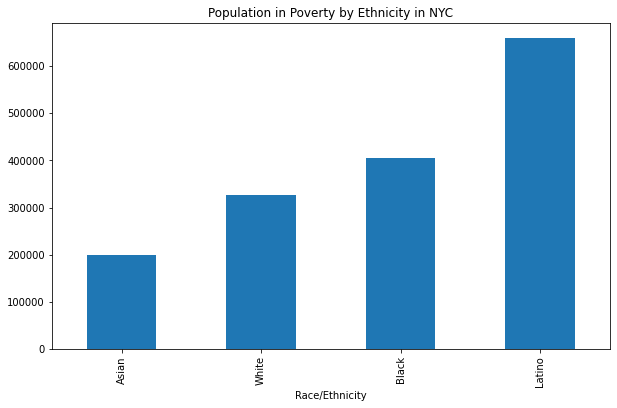

In [57]:
df_NYC_graph = df_sum_mean.plot.bar(figsize=(10,6))
df_NYC_graph.set_title('Population in Poverty by Ethnicity in NYC')

In [42]:
cd = [110,111,201,202,203,204,205,206]
top_asthma_df = df.loc[df['Fips'].isin(cd)]
top_asthma_df

,Location,Race/Ethnicity,TimeFrame,DataFormat,Data,Fips
720,Central Harlem,All Races and Ethnicities,2007,Number,36985.00000,110
721,Central Harlem,White,2007,Number,583.00000,110
722,Central Harlem,Black,2007,Number,28151.00000,110
723,Central Harlem,Latino,2007,Number,7170.00000,110
724,Central Harlem,Asian,2007,Number,0.00000,110
...,...,...,...,...,...,...
1422,East Tremont,Asian,2014,Number,322.79566,206
1423,East Tremont,Black,2014,Number,9739.54175,206
1424,East Tremont,Latino,2014,Number,24188.22268,206
1425,East Tremont,White,2014,Number,1113.44072,206


In [51]:
top_asthma_df_sum = top_asthma_df.groupby(['Location','Race/Ethnicity','TimeFrame'])['Data'].sum()
top_asthma_df_sum = top_asthma_df_sum.reset_index()
top_asthma_df_sum.head(20)

,Location,Race/Ethnicity,TimeFrame,Data
0,Central Harlem,All Races and Ethnicities,2007,36985.0
1,Central Harlem,All Races and Ethnicities,2008,34794.0
2,Central Harlem,All Races and Ethnicities,2009,34259.0
3,Central Harlem,All Races and Ethnicities,2010,36771.0
4,Central Harlem,All Races and Ethnicities,2011,30755.0
5,Central Harlem,All Races and Ethnicities,2012,38785.0
6,Central Harlem,All Races and Ethnicities,2013,50268.0
7,Central Harlem,All Races and Ethnicities,2014,38808.0
8,Central Harlem,Asian,2007,0.0
9,Central Harlem,Asian,2008,2393.0


In [58]:
top_asthma_df_sum = top_asthma_df_sum.loc[top_asthma_df_sum['Data'] != 0]
top_asthma_df_sum

,Location,Race/Ethnicity,TimeFrame,Data
9,Central Harlem,Asian,2008,2393.0
10,Central Harlem,Asian,2009,831.0
11,Central Harlem,Asian,2010,1110.0
12,Central Harlem,Asian,2011,726.0
13,Central Harlem,Asian,2012,532.0
...,...,...,...,...
311,University Heights,White,2010,772.0
312,University Heights,White,2011,598.0
313,University Heights,White,2012,1521.0
314,University Heights,White,2013,765.0


In [59]:
top_asthma_df_sum = top_asthma_df_sum.loc[top_asthma_df_sum['Race/Ethnicity'] != 'All Races and Ethnicities']
top_asthma_df_sum

,Location,Race/Ethnicity,TimeFrame,Data
9,Central Harlem,Asian,2008,2393.0
10,Central Harlem,Asian,2009,831.0
11,Central Harlem,Asian,2010,1110.0
12,Central Harlem,Asian,2011,726.0
13,Central Harlem,Asian,2012,532.0
...,...,...,...,...
311,University Heights,White,2010,772.0
312,University Heights,White,2011,598.0
313,University Heights,White,2012,1521.0
314,University Heights,White,2013,765.0


In [65]:
top_asthma_df_sum_mean = race_asthma_df.groupby(['Race/Ethnicity'])['Data'].mean()
top_asthma_df_sum_mean = top_asthma_df_sum_mean.sort_values(ascending=True)
top_asthma_df_sum_mean

Race/Ethnicity
Asian       731.403509
White      1047.828125
Black     12000.640625
Latino    23995.578125
Name: Data, dtype: float64

Text(0.5, 1.0, 'Population in Poverty by Ethnicity in Top Asthma Regions')

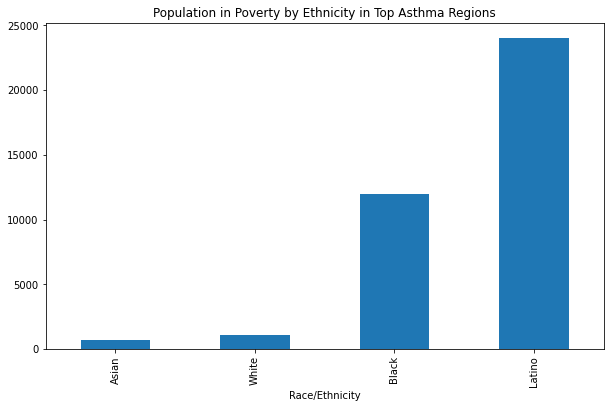

In [67]:
top_asthma_graph = top_asthma_df_sum_mean.plot.bar(figsize=(10,6))
top_asthma_graph.set_title('Population in Poverty by Ethnicity in Top Asthma Regions')